# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [5]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)

# Inspecciona su forma y tamaño
datos.shape
datos.size
print(datos.shape)
print(datos.size)

(5298, 7)
37086


In [0]:
import numpy as np
import matplotlib.pyplot as plt
B=datos[:,0]
V=datos[:1]
plt.hist(B)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()
fig, ax = plt.subplots()
plt.hist(datos[:,5])

## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

(array([696., 928., 841., 800., 701., 303., 294., 256., 242., 237.]),
 array([0.85  , 0.8964, 0.9428, 0.9892, 1.0356, 1.082 , 1.1284, 1.1748,
        1.2212, 1.2676, 1.314 ]),
 <a list of 10 Patch objects>)

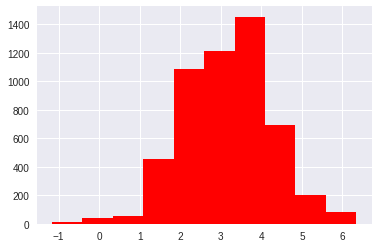

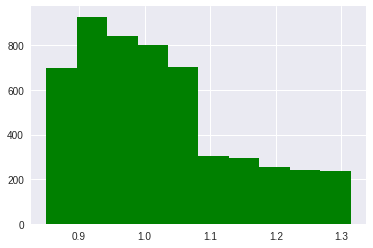

In [77]:

import matplotlib.pyplot as plt
%matplotlib inline
B=datos[:,0]
plt.hist(B)
V=datos[:,0]
plt.hist(V,facecolor="r")


fig, ax = plt.subplots()
plt.hist(datos[:,5],facecolor='g')

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [100]:
#Filtrar por distancia

datos_filtrados = datos[B<1].copy()
print(datos_filtrados)
print("El set original contenia  "+str( B.size )+"  estrellas, luego de filtrar quedaron  "+str( datos_filtrados.size))

[[ 0.25725575 -1.00155302 -1.58679165 -2.12079165  3.6561      1.312
   3.06366778]
 [ 0.32701713 -0.86535594 -1.58563338 -2.13663338  3.6498      1.08
   2.84756289]
 [ 0.59680064 -0.49727849 -2.6630077  -4.7650077   3.4938      1.042
   2.9716555 ]
 [-0.96211562 -2.43936238 -3.37759452 -4.26559452  3.5861      1.077
   2.95448028]
 [ 0.13929129 -1.12427067 -1.73431876 -2.27831876  3.6525      1.314
   3.08415537]
 [-0.23335654 -1.41099727 -2.11279094 -2.64779094  3.6553      1.012
   2.99117493]
 [-0.3220389  -1.55116337 -2.28056897 -2.83156897  3.6493      1.014
   3.01221666]
 [ 0.94961106 -0.20968668 -0.74264323 -1.22964323  3.6746      1.306
   2.9707859 ]
 [ 0.76269094 -0.32593549 -1.07716247 -1.60216247  3.6594      1.079
   2.89046361]
 [-0.19766763 -1.40686324 -2.10988118 -2.65388118  3.6519      1.01
   3.04806177]
 [ 0.97956212 -0.16775249 -0.74292864 -1.22992864  3.6744      1.306
   2.98960817]
 [-0.82088258 -2.31130534 -3.21928096 -4.07028096  3.5896      1.078
   3.0913

## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)

def mag_abs(mag_ap, dist):
    M += mag_abs-5*np.log10(dist)+5
    return M

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

In [0]:
#Crear arrays MV y color


#plot cmd


## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

In [0]:
# plot cmd + masa / smd + temp

In [0]:
# plot cmd hist2D